In [ ]:
pip install scikit-learn


In [ ]:

!pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 3.2 MB/s eta 0:00:00


In [ ]:

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

#from colorama import Fore
from tld import get_tld , is_tld

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle
import re
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from nltk import ngrams
import joblib

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/phishing_site_urls.csv")

In [ ]:
df1.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [ ]:
df1.shape

(549346, 2)

In [ ]:
df1.isnull().sum()

URL      0
Label    0
dtype: int64

In [ ]:
df = df1.head(450000)

<Axes: xlabel='Label', ylabel='count'>

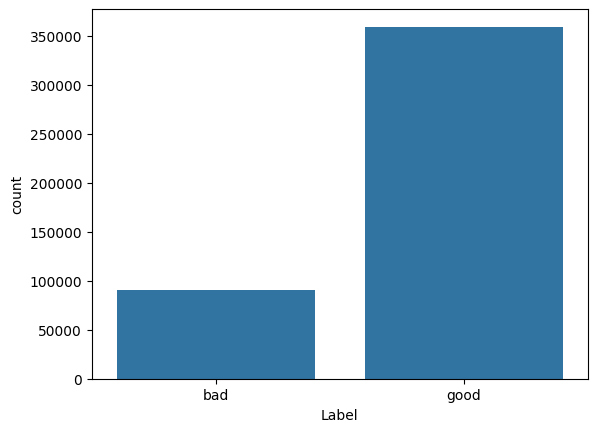

In [ ]:
sns.countplot(x="Label",data=df)

Label
good    359329
bad      90671
Name: count, dtype: int64


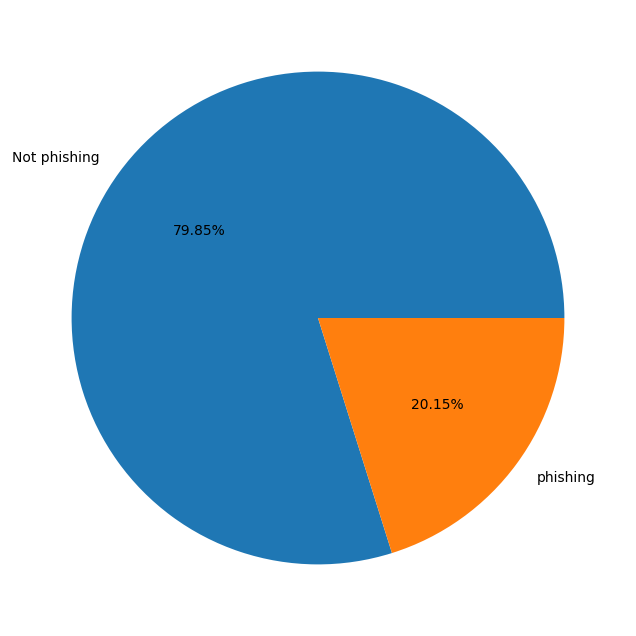

In [ ]:
labels = {"good" : "Not phishing", "bad" : "phishing"}
label_counts = df['Label'].value_counts()
print(label_counts)
plt.figure(figsize=(10, 8))
plt.pie(label_counts, labels = labels.values(), autopct = "%.2f%%")
plt.show()

In [ ]:
df.sample(5)

,URL,Label
80237,www.giac.org/paper/gsec/1811/develop-good-secu...,good
402366,nbcuni.com/corporate/newsroom/major-league-soc...,good
425227,rottentomatoes.com/celebrity/alex_dane/biograp...,good
29620,secure.paypal-service-us.cgi.bin.verify-accoun...,bad
146272,athletics.concordia.ca/intercollegiate/stars/a...,good


In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
tokenizer.tokenize(df.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [ ]:

print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 6.2819931520000125 sec


<ipython-input-15-721228981218>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))


In [ ]:
df.sample(5)

,URL,Label,text_tokenized
169629,en.goldenmap.com/Zre%c4%8de,good,"[en, goldenmap, com, Zre, c, de]"
288225,baseball-almanac.com/yearly/debut.php?y=1907&l=AL,good,"[baseball, almanac, com, yearly, debut, php, y..."
113864,berjois.info/newzealand/x/?14710263781291,bad,"[berjois, info, newzealand, x]"
16457,www.ihbp.org/6503510685/143493053/,bad,"[www, ihbp, org]"
33476,zip.net/bdRZC,bad,"[zip, net, bdRZC]"


In [ ]:
stemmer = SnowballStemmer("english")

In [ ]:
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 66.21177226999998 sec


<ipython-input-18-ea33128d07f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])


In [ ]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed
174654,en.wikipedia.org/wiki/Financial_services,good,"[en, wikipedia, org, wiki, Financial, services]","[en, wikipedia, org, wiki, financi, servic]"
411009,oursportscentral.com/sports/?t_id=2212,good,"[oursportscentral, com, sports, t, id]","[oursportscentr, com, sport, t, id]"
141091,airlinepilotcentral.com/airlines/cargo/amerifl...,good,"[airlinepilotcentral, com, airlines, cargo, am...","[airlinepilotcentr, com, airlin, cargo, amerif..."
320446,electionalmanac.com/canada/quebec/ridings.php,good,"[electionalmanac, com, canada, quebec, ridings...","[electionalmanac, com, canada, quebec, ride, php]"
77090,search.cpan.org/rss/search.rss,good,"[search, cpan, org, rss, search, rss]","[search, cpan, org, rss, search, rss]"


In [ ]:
print('Get joiningwords ...')# Joining all the stemmmed words
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 0.23423962999999048 sec


<ipython-input-20-fd943bcc3936>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))


In [ ]:
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [ ]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [ ]:
df['url_len'] = df['URL'].apply(lambda x: len(str(x)))

<ipython-input-25-211b0490bc4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['url_len'] = df['URL'].apply(lambda x: len(str(x)))


In [ ]:
def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

In [ ]:
df['domain'] = df['URL'].apply(lambda i: process_tld(i))

<ipython-input-27-10e657bfb1c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['domain'] = df['URL'].apply(lambda i: process_tld(i))


In [ ]:

df.head()

,URL,Label,text_tokenized,text_stemmed,text_sent,url_len,domain
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...,225,nobell.it
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...,81,www.dghjdgf.com
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...,177,serviciosbys.com
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...,60,mail.printakid.com
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...,116,thewhiskeydregs.com


In [ ]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    df[a] = df['URL'].apply(lambda i: i.count(a))

<ipython-input-29-69eee644cb4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[a] = df['URL'].apply(lambda i: i.count(a))
<ipython-input-29-69eee644cb4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[a] = df['URL'].apply(lambda i: i.count(a))
<ipython-input-29-69eee644cb4f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text_sent,url_len,domain,@,?,-,=,.,#,%,+,$,!,*,",",//
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...,225,nobell.it,0,1,4,4,6,0,0,0,0,0,0,0,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...,81,www.dghjdgf.com,0,0,2,2,5,0,0,0,0,0,0,0,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...,177,serviciosbys.com,0,0,1,0,7,0,0,0,0,0,0,0,0
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...,60,mail.printakid.com,0,0,0,0,6,0,0,0,0,0,0,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...,116,thewhiskeydregs.com,0,1,1,0,1,0,0,0,0,0,0,0,1


In [ ]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [ ]:
df['abnormal_url'] = df['URL'].apply(lambda i: abnormal_url(i))

<ipython-input-32-70a1b2881d2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abnormal_url'] = df['URL'].apply(lambda i: abnormal_url(i))


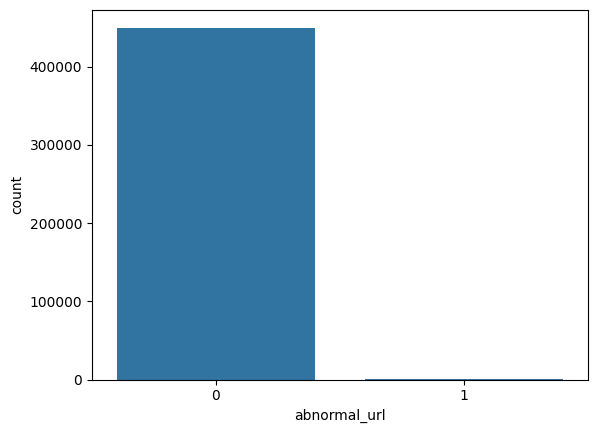

In [ ]:
sns.countplot(x='abnormal_url', data=df);

In [ ]:
def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

In [ ]:
df['https'] = df['URL'].apply(lambda i: httpSecure(i))

<ipython-input-35-e36230d2b290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['https'] = df['URL'].apply(lambda i: httpSecure(i))


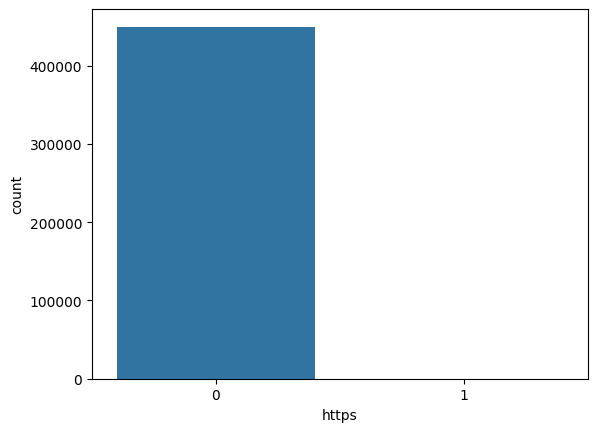

In [ ]:
sns.countplot(x='https', data=df);

In [ ]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

In [ ]:
df['digits']= df['URL'].apply(lambda i: digit_count(i))

<ipython-input-38-d4076427c6cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['digits']= df['URL'].apply(lambda i: digit_count(i))


In [ ]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

In [ ]:

df['letters']= df['URL'].apply(lambda i: letter_count(i))

<ipython-input-40-86681960e54f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['letters']= df['URL'].apply(lambda i: letter_count(i))


In [ ]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

In [ ]:
df['Shortining_Service'] = df['URL'].apply(lambda x: Shortining_Service(x))

<ipython-input-42-dea5e2398d2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Shortining_Service'] = df['URL'].apply(lambda x: Shortining_Service(x))


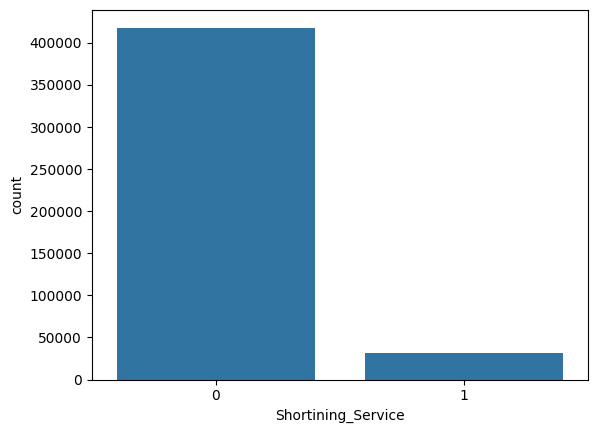

In [ ]:
sns.countplot(x='Shortining_Service', data=df);

In [ ]:

def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

In [ ]:
df['having_ip_address'] = df['URL'].apply(lambda i: having_ip_address(i))

<ipython-input-45-5f48226e5748>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['having_ip_address'] = df['URL'].apply(lambda i: having_ip_address(i))


In [ ]:
df['having_ip_address'].value_counts()

having_ip_address
0    449271
1       729
Name: count, dtype: int64

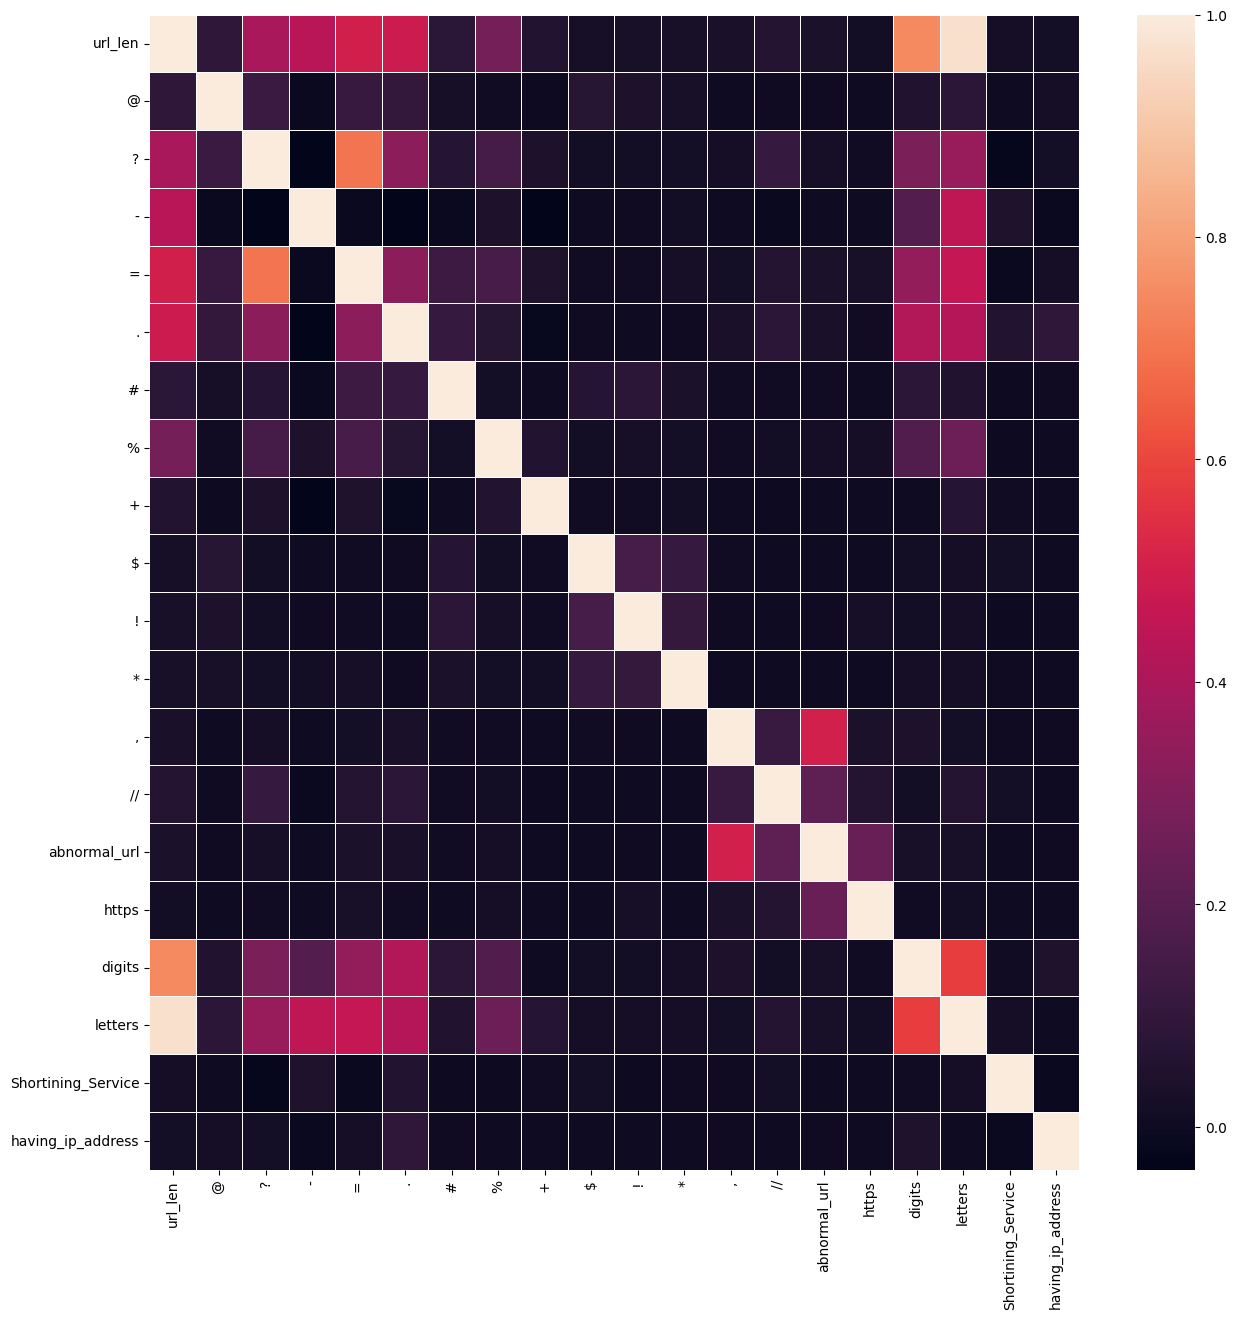

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create a figure with a specified size
plt.figure(figsize=(15, 15))

# Create a heatmap of the correlation matrix of the numeric DataFrame
sns.heatmap(numeric_df.corr(), linewidths=.5)

# Show the plot
plt.show()


In [ ]:
df

,URL,Label,text_tokenized,text_stemmed,text_sent,url_len,domain,@,?,-,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...,225,nobell.it,0,1,4,...,0,0,0,0,0,0,58,135,0,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...,81,www.dghjdgf.com,0,0,2,...,0,0,0,0,0,0,1,65,0,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...,177,serviciosbys.com,0,0,1,...,0,0,0,0,0,0,47,111,0,0
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...,60,mail.printakid.com,0,0,0,...,0,0,0,0,0,0,0,52,0,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...,116,thewhiskeydregs.com,0,1,1,...,0,0,0,1,0,0,21,82,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,tradedue.com/Itm140331461431_10182_Huge_PROFES...,good,"[tradedue, com, Itm, Huge, PROFESSIONAL, CLARI...","[tradedu, com, itm, huge, profession, clarinet...",tradedu com itm huge profession clarinet sheet...,89,tradedue.com,0,0,0,...,0,0,0,0,0,0,17,62,0,0
449996,tradefairguide.net/,good,"[tradefairguide, net]","[tradefairguid, net]",tradefairguid net,19,tradefairguide.net,0,0,0,...,0,0,0,0,0,0,0,17,0,0
449997,tradeindia.com/,good,"[tradeindia, com]","[tradeindia, com]",tradeindia com,15,tradeindia.com,0,0,0,...,0,0,0,0,0,0,0,13,0,0
449998,tradeindia.com/Seller/Food-Beverage/Canned-Food/,good,"[tradeindia, com, Seller, Food, Beverage, Cann...","[tradeindia, com, seller, food, beverag, can, ...",tradeindia com seller food beverag can food,48,tradeindia.com,0,0,2,...,0,0,0,0,0,0,0,41,0,0


<ipython-input-49-99377366a10d>:34: UserWarning: Glyph 135 (\x87) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


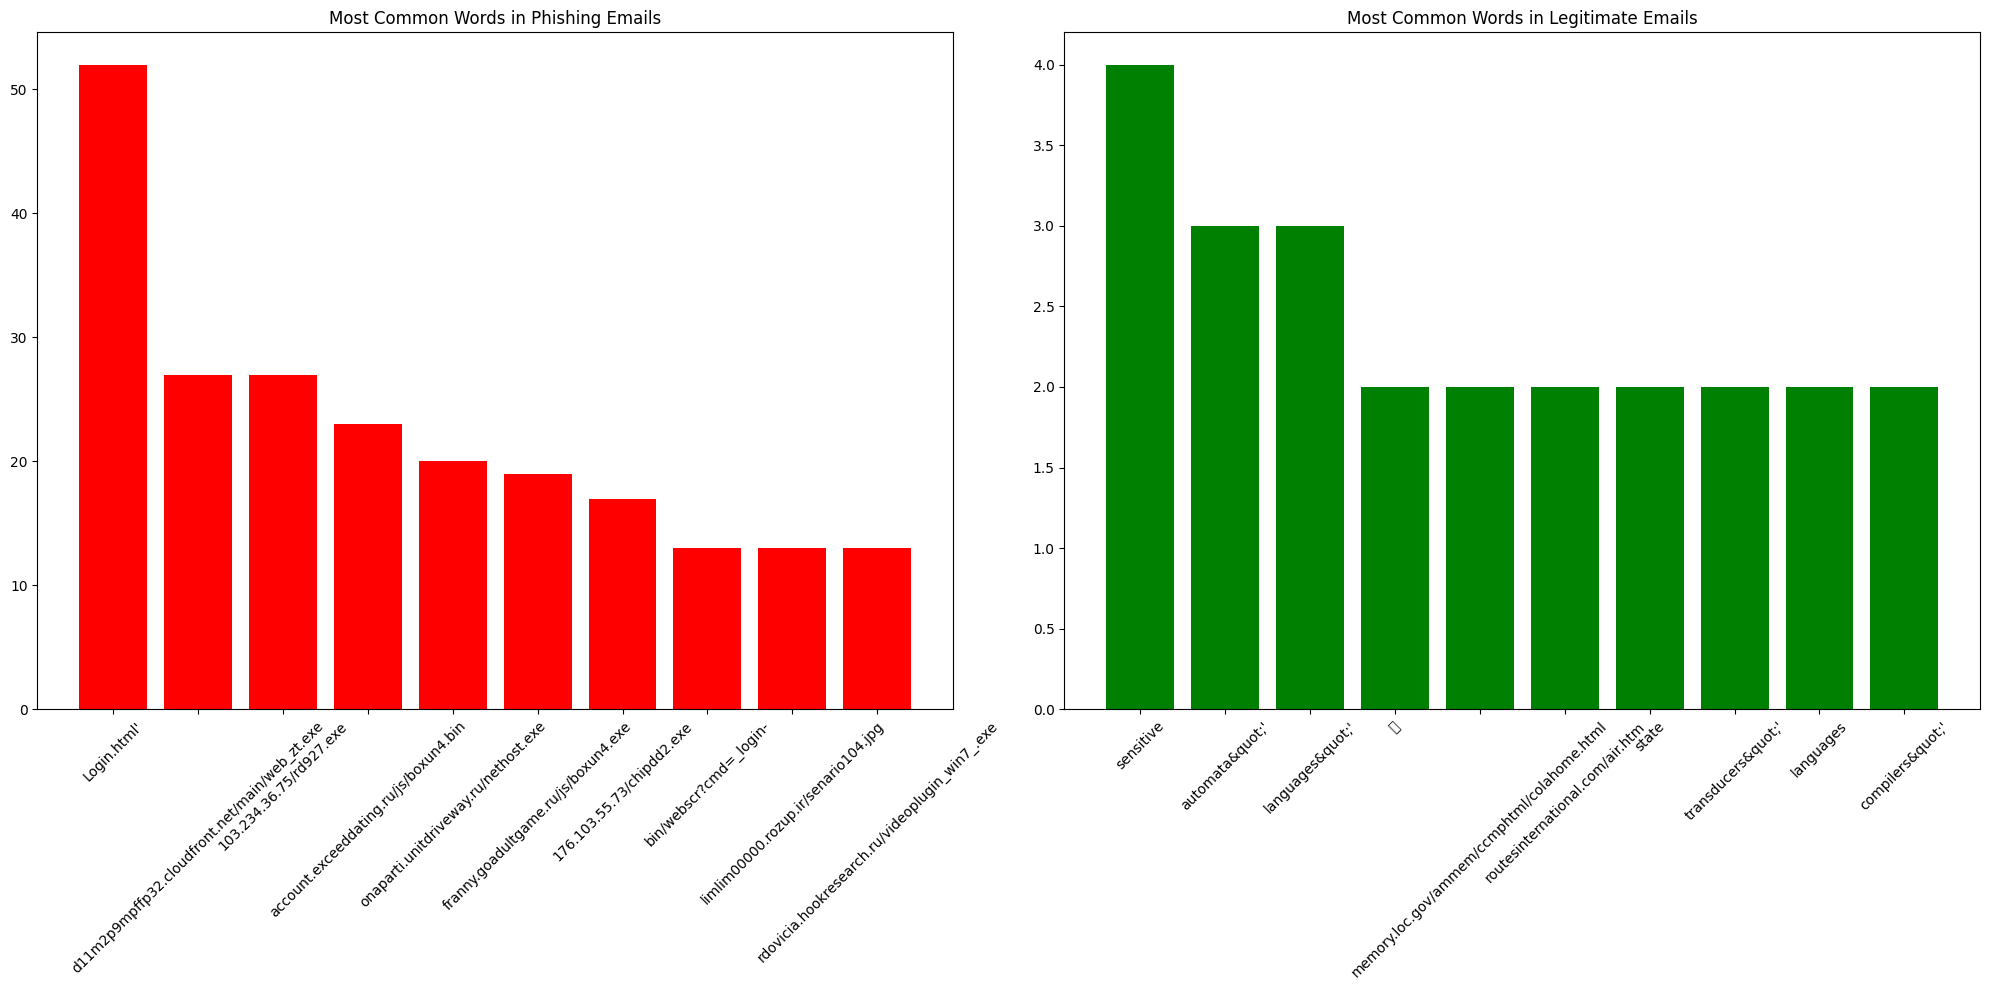

In [ ]:
# Separate the spam and legitimate emails
ph_emails = df[df['Label'] == "bad"]['URL']
legit_emails = df[df['Label'] == "good"]['URL']

# Count word frequencies for spam
ph_words = Counter()
ph_emails.apply(lambda x: ph_words.update(x.split()))

# Count word frequencies for legitimate emails
legit_words = Counter()
legit_emails.apply(lambda x: legit_words.update(x.split()))

# Get the most common words in spam and legitimate emails
ph_common = ph_words.most_common(10)
legit_common = legit_words.most_common(10)

# Convert to DataFrame
ph_common_df = pd.DataFrame(ph_common, columns=['Word', 'Frequency'])
legit_common_df = pd.DataFrame(legit_common, columns=['Word', 'Frequency'])

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.bar(ph_common_df['Word'], ph_common_df['Frequency'], color='red')
plt.title('Most Common Words in Phishing Emails')
plt.xticks(rotation=45)

# Plotting the most common words in legitimate emails
plt.subplot(1, 2, 2)
plt.bar(legit_common_df['Word'], legit_common_df['Frequency'], color='green')
plt.title('Most Common Words in Legitimate Emails')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-50-6672e17a721c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bigrams'] = df['URL'].apply(lambda x: generate_ngrams(x, n=2))


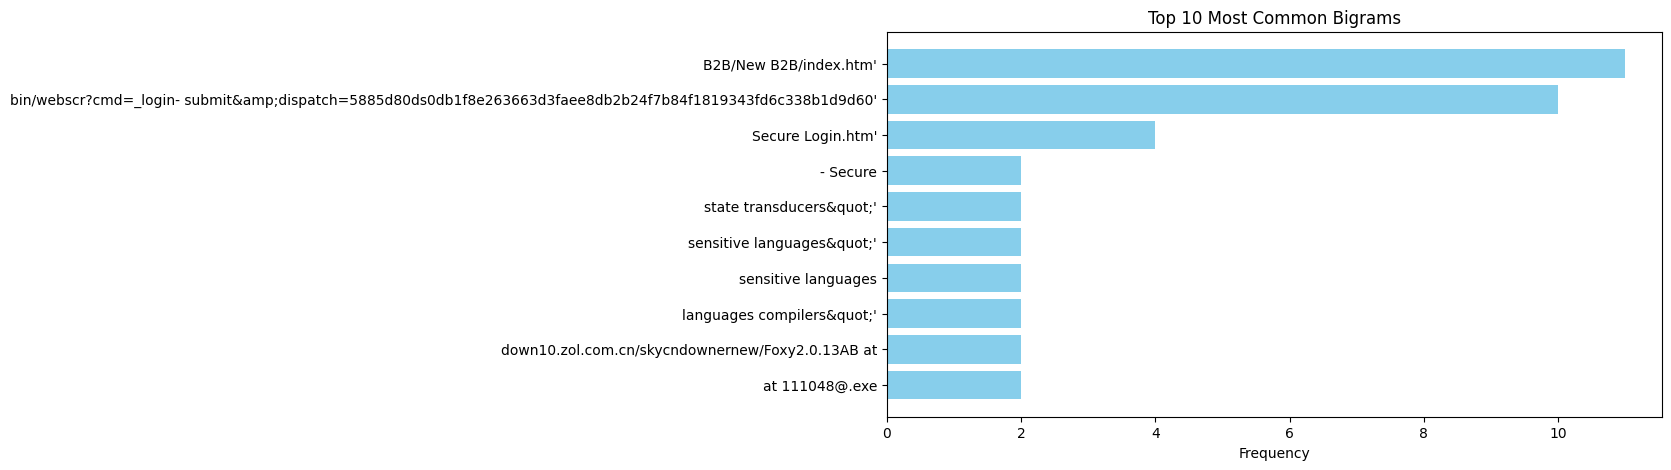

In [ ]:
# Extract n-grams from text
def generate_ngrams(text, n=2):
    # Split the text into words
    words = text.split()
    # Ensure that there is no enough words
    if len(words) >= n:
        return [' '.join(grams) for grams in ngrams(words, n)]
    else:
        return []

# Convert bigrams
df['bigrams'] = df['URL'].apply(lambda x: generate_ngrams(x, n=2))

# count the frequencies
bigram_counts = Counter([bigram for sublist in df['bigrams'] for bigram in sublist])

# Get the most common bigrams
most_common_bigrams = bigram_counts.most_common(10)

# Convert to DataFrame for visualization
bigrams_df = pd.DataFrame(most_common_bigrams, columns=['Bigram', 'Frequency'])

# Plot the most common bigrams
plt.figure(figsize=(10, 5))
plt.barh(bigrams_df['Bigram'], bigrams_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Bigrams')
plt.gca().invert_yaxis()  # Display the highest count at the top
plt.show()

In [ ]:
# Create a new DataFrame without the 'Label' column
df_without_label = df.drop(columns=['Label'])
df_without_label

,URL,text_tokenized,text_stemmed,text_sent,url_len,domain,@,?,-,=,...,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address,bigrams
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...,225,nobell.it,0,1,4,4,...,0,0,0,0,0,58,135,0,0,[]
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...,81,www.dghjdgf.com,0,0,2,2,...,0,0,0,0,0,1,65,0,0,[]
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...,177,serviciosbys.com,0,0,1,0,...,0,0,0,0,0,47,111,0,0,[]
3,mail.printakid.com/www.online.americanexpress....,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...,60,mail.printakid.com,0,0,0,0,...,0,0,0,0,0,0,52,0,0,[]
4,thewhiskeydregs.com/wp-content/themes/widescre...,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...,116,thewhiskeydregs.com,0,1,1,0,...,0,0,1,0,0,21,82,0,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449995,tradedue.com/Itm140331461431_10182_Huge_PROFES...,"[tradedue, com, Itm, Huge, PROFESSIONAL, CLARI...","[tradedu, com, itm, huge, profession, clarinet...",tradedu com itm huge profession clarinet sheet...,89,tradedue.com,0,0,0,0,...,0,0,0,0,0,17,62,0,0,[]
449996,tradefairguide.net/,"[tradefairguide, net]","[tradefairguid, net]",tradefairguid net,19,tradefairguide.net,0,0,0,0,...,0,0,0,0,0,0,17,0,0,[]
449997,tradeindia.com/,"[tradeindia, com]","[tradeindia, com]",tradeindia com,15,tradeindia.com,0,0,0,0,...,0,0,0,0,0,0,13,0,0,[]
449998,tradeindia.com/Seller/Food-Beverage/Canned-Food/,"[tradeindia, com, Seller, Food, Beverage, Cann...","[tradeindia, com, seller, food, beverag, can, ...",tradeindia com seller food beverag can food,48,tradeindia.com,0,0,2,0,...,0,0,0,0,0,0,41,0,0,[]


In [ ]:


df_without_label = df.drop(columns=['Label'])
# Concatenate all text columns into a single Series, converting lists to strings
text_data = df_without_label.apply(lambda x: ' '.join(map(str, x)), axis=1)

# Initialize CountVectorizer
cv = CountVectorizer()

# Fit and transform the text data
features = cv.fit_transform(text_data)

# Check the shape of the feature matrix
print(features.shape)


(450000, 629427)


In [ ]:
features[:26].toarray()
# convert sparse matrix into array to print transformed features


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(features, df.Label)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(trainX,trainY)

LogisticRegression(max_iter=1000)

The accuracy :  0.9824888888888889
Training Accuracy : 0.99976
Testing Accuracy : 0.9824888888888889

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.98      0.96     21717
        Good       1.00      0.98      0.99     90783

    accuracy                           0.98    112500
   macro avg       0.96      0.98      0.97    112500
weighted avg       0.98      0.98      0.98    112500


CONFUSION MATRIX


<Axes: >

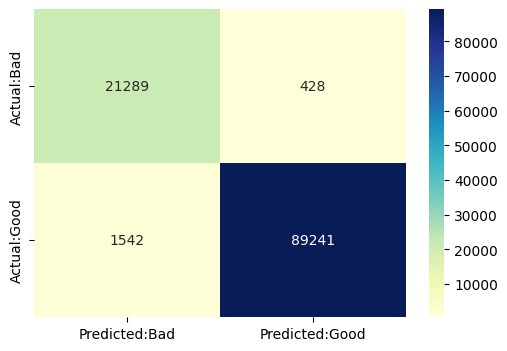

In [ ]:
print("The accuracy : ",lr.score(testX,testY))

print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:

joblib.dump(lr, 'phUrlLpg.joblib')
lr_loaded = joblib.load('phUrlLpg.joblib')

In [ ]:

def preprocess_url(url):
    tokenizer = RegexpTokenizer(r'[A-Za-z]+')
    stemmer = SnowballStemmer("english")
    text_tokenized = tokenizer.tokenize(url)
    text_stemmed = [stemmer.stem(word) for word in text_tokenized]
    text_sent = ' '.join(text_stemmed)
    return text_sent


def preprocess_and_extract_features(url):

    # Preprocess URL
    preprocessed_url = preprocess_url(url)
    # Extract features
    features = {
        'url_length': len(url),
        'domain': process_tld(url),
        'abnormal_url': abnormal_url(url),
        'http_secure': httpSecure(url),
        'digit_count': digit_count(url),
        'letter_count': letter_count(url),
        'shortening_service': Shortining_Service(url),
        'having_ip_address': having_ip_address(url)
    }
    return preprocessed_url, features

# URL to test
test_url = "https://eas.taibahu.edu.sa/TaibahReg/student_login.jsp"

# Preprocess the URL and extract features
preprocessed_url, test_features = preprocess_and_extract_features(test_url)

# Combine the preprocessed URL and features into a single dictionary
combined_features = {**test_features, 'preprocessed_url': preprocessed_url}
print(combined_features)
# Convert combined features to a feature vector using CountVectorizer
feature_vector = cv.transform([str(combined_features)])

# Make predictions using the trained model
prediction = lr.predict(feature_vector)
# Print the prediction
print("Prediction for the URL", test_url, ":", prediction[0])
# Apply the trained model to predict the probability of the URL being phishing
probability =lr.predict_proba(feature_vector)
# Print the prediction and probability score
if prediction[0] == "bad":
    print("The URL is classified as phishing with a probability of {:.2f}%.".format(probability[0][1] * 100))
else:
    print("The URL is classified as legitimate with a probability of {:.2f}%.".format(probability[0][0] * 100))

lr_loaded = joblib.load('phUrlLpg.joblib')
predictions = lr_loaded.predict(feature_vector)

probability = lr_loaded.predict_proba(feature_vector)


accuracy = lr_loaded.score(testX, testY)
print("Accuracy:", accuracy)

##يعتمد

{'url_length': 54, 'domain': 'eas.taibahu.edu.sa', 'abnormal_url': 1, 'http_secure': 1, 'digit_count': 0, 'letter_count': 44, 'shortening_service': 0, 'having_ip_address': 0, 'preprocessed_url': 'https ea taibahu edu sa taibahreg student login jsp'}
Prediction for the URL https://eas.taibahu.edu.sa/TaibahReg/student_login.jsp : bad
The URL is classified as phishing with a probability of 49.44%.
Accuracy: 0.9824888888888889


In [ ]:
import joblib
joblib.dump(lr, 'phUrlLpg.joblib')
lr_loaded = joblib.load('phUrlLpg.joblib')
predictions = lr_loaded.predict(feature_vector)

probability = lr_loaded.predict_proba(feature_vector)

# Print the prediction and probability score
if prediction[0] == "bad":
    print("The email is classified as phishing with a probability of {:.2f}%.".format(probability[0][1] * 100))
else:
    print("The email is classified as legitimate with a probability of {:.2f}%.".format(probability[0][0] * 100))

accuracy = lr_loaded.score(testX, testY)
print("Accuracy:", accuracy)

The email is classified as phishing with a probability of 49.44%.
Accuracy: 0.9824888888888889


Training Accuracy : 0.9902488888888888
Testing Accuracy : 0.9628533333333333

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.97      0.87      0.91     25524
        Good       0.96      0.99      0.98     86976

    accuracy                           0.96    112500
   macro avg       0.96      0.93      0.94    112500
weighted avg       0.96      0.96      0.96    112500


CONFUSION MATRIX


<Axes: >

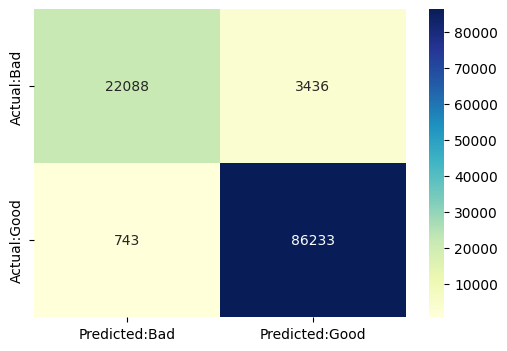

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
nb = MultinomialNB()
nb.fit(trainX, trainY)
predictions = nb.predict(testX)

print('Training Accuracy :',nb.score(trainX,trainY))
print('Testing Accuracy :',nb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(nb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(nb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:

def preprocess_url(url):
    tokenizer = RegexpTokenizer(r'[A-Za-z]+')
    stemmer = SnowballStemmer("english")
    text_tokenized = tokenizer.tokenize(url)
    text_stemmed = [stemmer.stem(word) for word in text_tokenized]
    text_sent = ' '.join(text_stemmed)
    return text_sent


def preprocess_and_extract_features(url):

    # Preprocess URL
    preprocessed_url = preprocess_url(url)
    # Extract features
    features = {
        'url_length': len(url),
        'domain': process_tld(url),
        'abnormal_url': abnormal_url(url),
        'http_secure': httpSecure(url),
        'digit_count': digit_count(url),
        'letter_count': letter_count(url),
        'shortening_service': Shortining_Service(url),
        'having_ip_address': having_ip_address(url)
    }
    return preprocessed_url, features

# URL to test
test_url = "https://colab.research.google.com/drive/1tegp74HN-g4En9Vf6NjlfwM52t1dUup1#scrollTo=saHMSGpI8Id2"

# Preprocess the URL and extract features
preprocessed_url, test_features = preprocess_and_extract_features(test_url)

# Combine the preprocessed URL and features into a single dictionary
combined_features = {**test_features, 'preprocessed_url': preprocessed_url}
print(combined_features)
# Convert combined features to a feature vector using CountVectorizer
feature_vector = cv.transform([str(combined_features)])

# Make predictions using the trained model

# Print the prediction
print("Prediction for the URL", test_url, ":", prediction[0])
# Apply the trained model to predict the probability of the URL being phishing

predictions = nb.predict(feature_vector)

probability = nb.predict_proba(feature_vector)

# Print the prediction and probability score
if predictions[0] == "bad":
    print("The URL is classified as phishing with a probability of {:.2f}%.".format(probability[0][1] * 100))
else:
    print("The URL is classified as legitimate with a probability of {:.2f}%.".format(probability[0][0] * 100))

accuracy = nb.score(testX, testY)
print("Accuracy:", accuracy)

##يعتمد

{'url_length': 95, 'domain': 'colab.research.google.com', 'abnormal_url': 1, 'http_secure': 1, 'digit_count': 12, 'letter_count': 72, 'shortening_service': 0, 'having_ip_address': 0, 'preprocessed_url': 'https colab research googl com drive tegp hn g en vf njlfwm t duup scrollto sahmsgpi id'}
Prediction for the URL https://colab.research.google.com/drive/1tegp74HN-g4En9Vf6NjlfwM52t1dUup1#scrollTo=saHMSGpI8Id2 : bad
The URL is classified as phishing with a probability of 8.74%.
Accuracy: 0.9628533333333333


In [ ]:
dt = DecisionTreeClassifier(max_depth=1000)

# Train the model on the training data
dt.fit(trainX, trainY)

DecisionTreeClassifier(max_depth=1000)

Training Accuracy : 0.9958874074074074
Testing Accuracy : 0.9712266666666667

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.95      0.93     21468
        Good       0.99      0.98      0.98     91032

    accuracy                           0.97    112500
   macro avg       0.95      0.96      0.95    112500
weighted avg       0.97      0.97      0.97    112500


CONFUSION MATRIX


<Axes: >

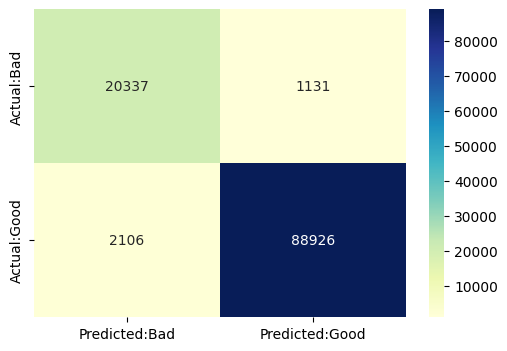

In [ ]:
print('Training Accuracy :',dt.score(trainX,trainY))
print('Testing Accuracy :',dt.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(dt.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(dt.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:

def preprocess_url(url):
    tokenizer = RegexpTokenizer(r'[A-Za-z]+')
    stemmer = SnowballStemmer("english")
    text_tokenized = tokenizer.tokenize(url)
    text_stemmed = [stemmer.stem(word) for word in text_tokenized]
    text_sent = ' '.join(text_stemmed)
    return text_sent


def preprocess_and_extract_features(url):

    # Preprocess URL
    preprocessed_url = preprocess_url(url)
    # Extract features
    features = {
        'url_length': len(url),
        'domain': process_tld(url),
        'abnormal_url': abnormal_url(url),
        'http_secure': httpSecure(url),
        'digit_count': digit_count(url),
        'letter_count': letter_count(url),
        'shortening_service': Shortining_Service(url),
        'having_ip_address': having_ip_address(url)
    }
    return preprocessed_url, features

# URL to test
test_url = "www.kaggle.com"

# Preprocess the URL and extract features
preprocessed_url, test_features = preprocess_and_extract_features(test_url)

# Combine the preprocessed URL and features into a single dictionary
combined_features = {**test_features, 'preprocessed_url': preprocessed_url}
print(combined_features)
# Convert combined features to a feature vector using CountVectorizer
feature_vector = cv.transform([str(combined_features)])

# Make predictions using the trained model
prediction = dt.predict(feature_vector)
# Print the prediction
print("Prediction for the URL", test_url, ":", prediction[0])

predictions = dt.predict(feature_vector)

probability = dt.predict_proba(feature_vector)

# Print the prediction and probability score
if predictions[0] == "bad":
    print("The URL is classified as phishing with a probability of {:.2f}%.".format(probability[0][1] * 100))
else:
    print("The URL is classified as legitimate with a probability of {:.2f}%.".format(probability[0][0] * 100))

accuracy = dt.score(testX, testY)
print("Accuracy:", accuracy)

##يعتمد

{'url_length': 14, 'domain': 'www.kaggle.com', 'abnormal_url': 0, 'http_secure': 0, 'digit_count': 0, 'letter_count': 12, 'shortening_service': 0, 'having_ip_address': 0, 'preprocessed_url': 'www kaggl com'}
Prediction for the URL www.kaggle.com : bad
The URL is classified as phishing with a probability of 0.00%.
Accuracy: 0.9898755555555555


In [ ]:
accuracy = [lr.score(testX, testY), dt.score(testX, testY), nb.score(testX, testY)]
output = pd.DataFrame({"Model": ['LogisticRegression', 'Decision Tree Classifier', 'MultinomialNB'],
                       "Accuracy": accuracy})

In [ ]:
output

,Model,Accuracy
0,LogisticRegression,0.982996
1,Decision Tree Classifier,0.989876
2,MultinomialNB,0.983262


In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from tld import get_tld
from urllib.parse import urlparse
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB


class PhishingSiteClassifier:
    def __init__(self):
        self.tokenizer = RegexpTokenizer(r'[A-Za-z]+')
        self.stemmer = SnowballStemmer("english")

    def tokenize_text(self, df):
        df['text_tokenized'] = df.URL.map(lambda t: self.tokenizer.tokenize(t))
        return df

    def stem_text(self, df):
        df['text_stemmed'] = df['text_tokenized'].map(lambda l: [self.stemmer.stem(word) for word in l])
        return df

    def join_text(self, df):
        df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
        return df

    def process_tld(self, url):
        try:
            res = get_tld(url, as_object=True, fail_silently=False, fix_protocol=True)
            pri_domain = res.parsed_url.netloc
        except:
            pri_domain = None
        return pri_domain

    def count_special_characters(self, df):
        features = ['@', '?', '-', '=', '.', '#', '%', '+', '$', '!', '*', ',', '//']
        for feature in features:
            df[feature] = df['URL'].apply(lambda i: i.count(feature))
        return df

    def abnormal_url(self, url):
        hostname = urlparse(url).hostname
        hostname = str(hostname)
        match = hostname in url
        return 1 if match else 0

    def http_secure(self, url):
        htp = urlparse(url).scheme
        return 1 if htp == 'https' else 0

    def digit_count(self, url):
        return sum(c.isdigit() for c in url)

    def letter_count(self, url):
        return sum(c.isalpha() for c in url)

    def shortening_service(self, url):
        match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                          'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                          'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                          'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                          'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                          'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                          'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                          'tr\.im|link\.zip\.net',
                          url)
        return 1 if match else 0

    def having_ip_address(self, url):
        match = re.search(
            '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
            '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
            '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
            '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
            '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'  # IPv4 in hexadecimal
            '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
            '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
            '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
        return 1 if match else 0

    def extract_features(self, df):
        df['domain'] = df['URL'].apply(lambda i: self.process_tld(i))
        df['abnormal_url'] = df['URL'].apply(lambda i: self.abnormal_url(i))
        df['https'] = df['URL'].apply(lambda i: self.http_secure(i))
        df['digits'] = df['URL'].apply(lambda i: self.digit_count(i))
        df['letters'] = df['URL'].apply(lambda i: self.letter_count(i))
        df['Shortining_Service'] = df['URL'].apply(lambda i: self.shortening_service(i))
        df['having_ip_address'] = df['URL'].apply(lambda i: self.having_ip_address(i))
        return df

    def prepare_data(self, df):
        cv = CountVectorizer()
        feature = cv.fit_transform(df.text_sent)
        return feature

    def train_model(self, X_train, y_train, model_name):
        if model_name == "LogisticRegression":
            model = LogisticRegression(max_iter=1000)
        elif model_name == "DecisionTreeClassifier":
            model = DecisionTreeClassifier(max_depth=1000)
        elif model_name == "MultinomialNB":
            model = MultinomialNB()
        else:
            raise ValueError("Invalid model name")
        model.fit(X_train, y_train)
        return model

if __name__ == "__main__":
    classifier = PhishingSiteClassifier()

    # Load dataset
    df1 = pd.read_csv("/content/phishing_site_urls.csv")
    df = df1.head(450000)

    # Tokenize, stem, and join text
    df = classifier.tokenize_text(df)
    df = classifier.stem_text(df)
    df = classifier.join_text(df)

    # Extract features
    df = classifier.extract_features(df)

    # Prepare data
    feature = classifier.prepare_data(df)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(feature, df.Label, test_size=0.2, random_state=42)

    # Train and evaluate models
    models = ["LogisticRegression", "DecisionTreeClassifier", "MultinomialNB"]

    for model_name in models:
        model = classifier.train_model(X_train, y_train, model_name)
        score = model.score(X_test, y_test)
        print(f"{model_name} Accuracy:", score)


<ipython-input-66-50317b7ddf4b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_tokenized'] = df.URL.map(lambda t: self.tokenizer.tokenize(t))
<ipython-input-66-50317b7ddf4b>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_stemmed'] = df['text_tokenized'].map(lambda l: [self.stemmer.stem(word) for word in l])
<ipython-input-66-50317b7ddf4b>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

LogisticRegression Accuracy: 0.9757222222222223
DecisionTreeClassifier Accuracy: 0.9717555555555556
MultinomialNB Accuracy: 0.9722555555555555


In [ ]:

# Commented out IPython magic to ensure Python compatibility.
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

import time
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
#from colorama import Fore
from tld import get_tld , is_tld


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle
import re
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

df1 = pd.read_csv("/content/drive/MyDrive/phishing_site_urls.csv")



df = df1.head(450000)


tokenizer = RegexpTokenizer(r'[A-Za-z]+')

tokenizer.tokenize(df.URL[0])


t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')


stemmer = SnowballStemmer("english")


t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0





t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0


bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']



df['url_len'] = df['URL'].apply(lambda x: len(str(x)))

def process_tld(url):
    try:
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

df['domain'] = df['URL'].apply(lambda i: process_tld(i))



feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    df[a] = df['URL'].apply(lambda i: i.count(a))



def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

df['abnormal_url'] = df['URL'].apply(lambda i: abnormal_url(i))


def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

df['https'] = df['URL'].apply(lambda i: httpSecure(i))



def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

df['digits']= df['URL'].apply(lambda i: digit_count(i))

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

df['letters']= df['URL'].apply(lambda i: letter_count(i))

def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

df['Shortining_Service'] = df['URL'].apply(lambda x: Shortining_Service(x))



def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

df['having_ip_address'] = df['URL'].apply(lambda i: having_ip_address(i))

df['having_ip_address'].value_counts()





cv = CountVectorizer()

feature = cv.fit_transform(df.text_sent)
#transform all text which we tokenize and stemed











def preprocess_url(url):
    tokenizer = RegexpTokenizer(r'[A-Za-z]+')
    stemmer = SnowballStemmer("english")
    text_tokenized = tokenizer.tokenize(url)
    text_stemmed = [stemmer.stem(word) for word in text_tokenized]
    text_sent = ' '.join(text_stemmed)
    return text_sent


# Preprocess the URL and extract features
def preprocess_and_extract_features(url):
    # Preprocess URL
    preprocessed_url = preprocess_url(url)
    # Extract features
    features = {
        'url_length': len(url),
        'domain': process_tld(url),
        'abnormal_url': abnormal_url(url),
        'http_secure': httpSecure(url),
        'digit_count': digit_count(url),
        'letter_count': letter_count(url),
        'shortening_service': Shortining_Service(url),
        'having_ip_address': having_ip_address(url)
    }
    return preprocessed_url, features

# URL to test
test_url = "https://colab.research.google.com/drive/1tegp74HN-g4En9Vf6NjlfwM52t1dUup1#scrollTo=Woz3ykiZA3R9"
# Preprocess the URL and extract features
preprocessed_url, test_features = preprocess_and_extract_features(test_url)

# Combine the preprocessed URL and features into a single dictionary
combined_features = {**test_features, 'preprocessed_url': preprocessed_url}

# Convert combined features to a feature vector using CountVectorizer
feature_vector = cv.transform([str(combined_features)])

# Make predictions using the trained model

# Convert combined features to a feature vector using CountVectorizer

model = joblib.load("phUrl.joblib")
# Make predictions using the trained model
prediction = model.predict(feature_vector)

# Print the prediction


# Apply the trained model to predict the probability of the URL being phishing
probability = model.predict_proba(feature_vector)

# Print the prediction and probability score
if prediction[0] == "bad":
    print("The URL is classified as phishing with a probability of {:.2f}%.".format(probability[0][1] * 100))
else:
    print("The URL is classified as legitimate with a probability of {:.2f}%.".format(probability[0][0] * 100))
